<!-- Student -->
# Monte Carlo

Histogram bins start at 0.0 finish at 1.0
Number of bins is 10 and width of bins is 0.1


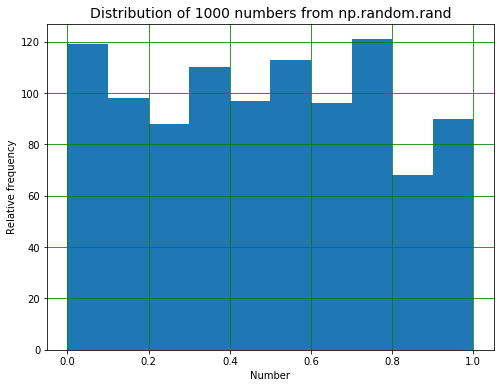

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
#
binBot = 0.0
binTop = 1.0
binNumber = 10
binEdges = np.linspace(binBot, binTop, binNumber + 1)
binWidth = (binTop - binBot)/binNumber
print("Histogram bins start at",binBot,"finish at",binTop)
print("Number of bins is",binNumber,"and width of bins is",binWidth)
#
randArr = np.random.rand(1000)
#
plt.figure(figsize = (8, 6))
plt.title('Distribution of 1000 numbers from np.random.rand', fontsize = 14)
plt.xlabel('Number')
plt.ylabel('Relative frequency')
plt.hist(randArr, bins = binEdges)
plt.grid(color = 'g')
plt.show()

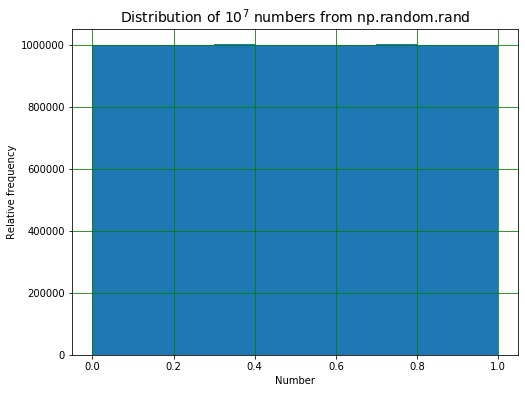

In [12]:
randArr = np.random.rand(10000000)
#
plt.figure(figsize = (8, 6))
plt.title('Distribution of $10^7$ numbers from np.random.rand', fontsize = 14)
plt.xlabel('Number')
plt.ylabel('Relative frequency')
plt.hist(randArr, bins = binEdges)
plt.grid(color = 'g')
#plt.savefig("MersenneTwister.png")
plt.show()

Histogram bins start at 0.0 finish at 67
Number of bins is 16 and width of bins is 4.1875
Bin centres are:
 [ 2.09375  6.28125 10.46875 14.65625 18.84375 23.03125 27.21875 31.40625
 35.59375 39.78125 43.96875 48.15625 52.34375 56.53125 60.71875 64.90625]
 


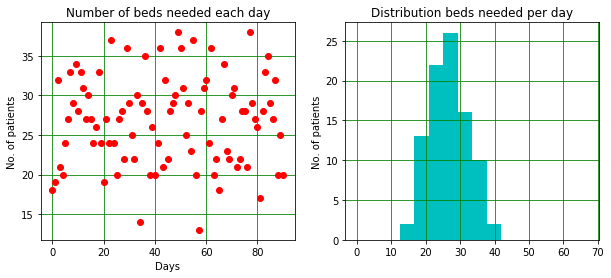

In [13]:
# <!-- Student -->
#
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#
# Average number of pationts per day
nPatsDay = 27
#
# Nmber of days in winter
nDays = 91
tArray = np.linspace(0, nDays - 1, nDays)
#
# Number of patients per day (i.e. number of beds needed per day), assuming Poisson dist. 
patsPerDay = np.random.poisson(nPatsDay, nDays) #
#
# Plot number of beds needed each day and the distribution of number of beds needed per day
binBot = 0.0
binTop = int(2.5*nPatsDay)
binNumber = binTop//4
binEdges, binWidth = np.linspace(binBot, binTop, binNumber + 1, retstep = True)
binCentres = (binEdges[1:binNumber + 1] + binEdges[0:binNumber])/2 
print("Histogram bins start at",binBot,"finish at",binTop)
print("Number of bins is",binNumber,"and width of bins is",binWidth)
print("Bin centres are:\n",binCentres)
print(" ")
#
plt.figure(figsize = (10, 4))
plt.subplot(1, 2, 1)
plt.title("Number of beds needed each day")
plt.xlabel("Days")
plt.ylabel("No. of patients")
plt.plot(tArray, patsPerDay, color = 'r', linestyle = '', marker = 'o')
plt.grid(color = 'g')
#
plt.subplot(1, 2, 2)
plt.title("Distribution beds needed per day")
plt.hist(patsPerDay, bins = binEdges, color = 'c')
plt.ylabel("Relative frequency")
plt.ylabel("No. of patients")
plt.grid(color = 'g')
#
plt.show()

 
Number of beds available 	 No. days one or more patients has no bed
		 0 				 91
		 5 				 91
		 10 				 91
		 15 				 89
		 20 				 76
		 25 				 54
		 30 				 24
		 35 				 8
		 40 				 0
		 45 				 0
		 50 				 0
		 55 				 0
		 60 				 0
		 65 				 0


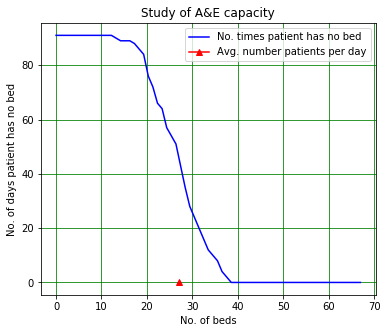

In [14]:
# <!-- Demo -->
#
# Set maximum number of beds
maxBedNumber = int(2.5*nPatsDay)
#
# Array of numbers of times there are no beds available
noBedArr = np.zeros(maxBedNumber)
print(" ")
print("Number of beds available \t No. days one or more patients has no bed")
#
# Loop over possible numbers of beds
for nBeds in range(0, maxBedNumber):
    #
    # Calculate the number of times one or more patients has no bed. The condition patsPerDay > nBeds is True whenever this
    # occurs. Adding up the number of Trues in the arrays (True = 1) gives the number of times this has occurred in the 
    # winter under study.
    nWithoutBed = np.sum(patsPerDay > nBeds)
    #
    # Save the value to it can be plotted
    noBedArr[nBeds] = nWithoutBed
    #
    # Provide a printout every time nBeds is divisible by 5.
    if nBeds%5 == 0:
        print("\t\t {:d} \t\t\t\t {:d}".format(nBeds, nWithoutBed))
#
# Create an array containing the numbers of beds available for the plot.
bedNumberArr = np.linspace(0, maxBedNumber, maxBedNumber)
#
plt.figure(figsize = (6, 5))
plt.title("Study of A&E capacity")
plt.xlabel("No. of beds")
plt.ylabel("No. of days patient has no bed")
plt.plot(bedNumberArr, noBedArr, color = 'b', label = "No. times patient has no bed")
plt.plot(nPatsDay, 0.0, color = 'r', marker = '^', label = "Avg. number patients per day")
plt.legend()
plt.grid(color = 'g')
plt.show()

<!-- Student -->
Both this plot and the histogram of the number of patients arriving per day show us that something like 35...45 beds are needed in this winter. But what happens next winter? And the winter after that? We need to extend the model to look at the situation over several years if we want to check that the number of occasions on which we run out of beds is small.

Histogram bins start at 0.0 finish at 67
Number of bins is 67 and width of bins is 1.0
Bin centres are:
 [ 0.5  1.5  2.5  3.5  4.5  5.5  6.5  7.5  8.5  9.5 10.5 11.5 12.5 13.5
 14.5 15.5 16.5 17.5 18.5 19.5 20.5 21.5 22.5 23.5 24.5 25.5 26.5 27.5
 28.5 29.5 30.5 31.5 32.5 33.5 34.5 35.5 36.5 37.5 38.5 39.5 40.5 41.5
 42.5 43.5 44.5 45.5 46.5 47.5 48.5 49.5 50.5 51.5 52.5 53.5 54.5 55.5
 56.5 57.5 58.5 59.5 60.5 61.5 62.5 63.5 64.5 65.5 66.5]
 
Too few beds on 219 days in total of 91000 days (proportion 2.4066e-03).
That is, enough beds on 90781 days (proportion 9.9759e-01).
 
Mean 27.000, RMS 5.196.
Mean + 3*RMS 42.588.
 


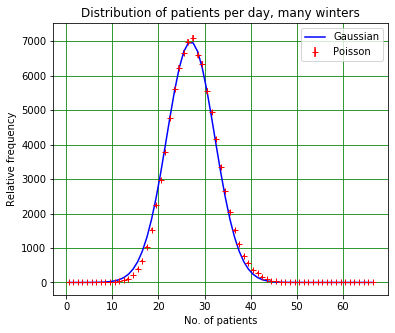

In [15]:
# <!-- Student -->
#
# Can use finer bins as have lots more events
binBot = 0.0
binTop = int(2.5*nPatsDay)
binNumber = binTop
binEdges, binWidth = np.linspace(binBot, binTop, binNumber + 1, retstep = True)
binCentres = (binEdges[1:binNumber + 1] + binEdges[0:binNumber])/2 
print("Histogram bins start at",binBot,"finish at",binTop)
print("Number of bins is",binNumber,"and width of bins is",binWidth)
print("Bin centres are:\n",binCentres)
#
nWinters = 1000
summedHist = np.zeros(binNumber)
#
for winter in range(0, nWinters):
    patsPerDay = np.random.poisson(nPatsDay, nDays)
    histThisWinter, bins = np.histogram(patsPerDay, bins = binEdges)
    summedHist = summedHist + histThisWinter
#
bedNumberArr = np.linspace(0, maxBedNumber, maxBedNumber)
#
totalDays = nWinters*nDays
numberOfBeds = 43
daysTooFewBeds = np.sum(summedHist[numberOfBeds:maxBedNumber]).astype(int)
daysEnoughBeds = totalDays -  daysTooFewBeds
propTooFewBeds = daysTooFewBeds/totalDays
propEnoughBeds = daysEnoughBeds/totalDays
print(" ")
print("Too few beds on {:d} days in total of {:d} days (proportion {:5.4e}).".format(daysTooFewBeds, totalDays, propTooFewBeds))
print("That is, enough beds on {:d} days (proportion {:5.4e}).".format(daysEnoughBeds, propEnoughBeds))
#
mean = nPatsDay
RMS = np.sqrt(nPatsDay)
norm = nWinters*nDays
gaussArr = norm/(np.sqrt(2*np.pi)*RMS)*np.exp(-(binCentres - mean)**2/(2*RMS**2))
print(" ")
print("Mean {:5.3f}, RMS {:5.3f}.".format(nPatsDay, RMS))
print("Mean + 3*RMS {:5.3f}.".format(nPatsDay+3*RMS))
print(" ")
#              
plt.figure(figsize = (6, 5))
plt.title("Distribution of patients per day, many winters")
plt.ylabel("Relative frequency")
plt.xlabel("No. of patients")
plt.errorbar(binCentres, summedHist/binWidth, yerr = np.sqrt(summedHist)/binWidth, 
             linestyle = '', marker = '+', color = 'r', label = 'Poisson')
plt.plot(binCentres, gaussArr, color = 'b', label = 'Gaussian')
plt.grid(color = 'g')
plt.legend()
plt.show()

<!-- Student -->
Now we see that about $43$ beds are needed. In fact, as calculated above, with this number of beds the probablility of there being too few beds on a given day is about 0.3%.

<!-- Student -->
## Calculating pi using random numbers

Count the grains that have fallen in the circle, $N_C$, and the total number of grains on the blanket, $N$. 

As the distribution of rice grains is uniform, the number in the circle and on the blanket is proportional to their respective areas. This means:

\begin{align*}
\frac{N_C}{N} &= \frac{\pi \times 1^2}{2 \times 2}\\ 
  &= \frac{\pi}{4}.
\end{align*}

We can therefore calculate the value of $\pi$ by dividing the number of grains in the circle by the number on the blanket and multiplying by $4$:

$$
\pi = 4\frac{N_C}{N}.
$$


In [16]:
# <!-- Student -->
#
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#
nGrains = 10000
riceX = np.random.rand(nGrains)
riceY = np.random.rand(nGrains)
riceR = np.sqrt(riceX**2 + riceY**2)
nCircle = np.sum(riceR < 1)
pi = 4*nCircle/nGrains
print(" ")
print("Number of grains on blanket {:d}, number in circle {:d}.".format(nGrains, nCircle))
print("Value of pi is approximately {:6.5f}".format(pi))

 
Number of grains on blanket 10000, number in circle 7814.
Value of pi is approximately 3.12560


<!-- Student -->
Now let's determine the error we expect on our value of $\pi$. This is a bit trickier than you might expect. We first write the ratio in terms of the independent quantities $N_C$, the number of grains in the circle and $N_{\bar C} = N - N_C$, the number not in the circle:

$$
\pi = 4\frac{{{N_C}}}{{{N}}} = 4\frac{{{N_C}}}{{{N_C} + {N_{\bar C}}}}.
$$

The standard error propagation formula states:

$$
(\Delta \pi )^2 = {\left( {\frac{{\partial \pi }}{{\partial {N_C}}}\Delta {N_C}} \right)^2} + {\left( {\frac{{\partial \pi }}{{\partial {N_{\bar C}}}}\Delta {N_{\bar C}}} \right)^2}.
$$

Using the formula for the derivative of a quotient, the partial derivatives are:

$$
\frac{{\partial \pi }}{{\partial {N_C}}} = 4\frac{{({N_C} + {N_{\bar C}}) - {N_C}}}{{{{\left( {{N_C} + {N_{\bar C}}} \right)}^2}}} = 4\frac{{{N_{\bar C}}}}{{{{\left( {{N_C} + {N_{\bar C}}} \right)}^2}}} = 4\frac{{{N_{\bar C}}}}{{{N}^2}}
$$

and

$$
\frac{{\partial \pi }}{{\partial {N_{\bar C}}}} = 4\frac{{ - {N_C}}}{{{{\left( {{N_C} + {N_{\bar C}}} \right)}^2}}} =  - 4\frac{{{N_C}}}{{{N}^2}}.
$$

As $\Delta N_C$ and $\Delta N_{\bar C}$ are $\sqrt N_C$ and $\sqrt N_{\bar C}$, respectively, we have:

\begin{align*}
{(\Delta \pi )^2} &= {\left( {\frac{{4{N_{\bar C}}}}{{{N^2}}}} \right)^2}{N_C} + {\left( {\frac{{4{N_C}}}{{{N^2}}}} \right)^2}{N_{\bar C}}\\
 &= \frac{{{4^2}}}{{{N^4}}}{N_{\bar C}}{N_C}\left( {{N_{\bar C}} + {N_C}} \right)\\
 &= \frac{{{4^2}}}{N}\frac{{{N_C}}}{N}\frac{{{N_{\bar C}}}}{N}.
\end{align*}

Using $p = \frac{N_C}{N}$, the probability of a grain landing in the circle, and $q = 1 - p = \frac{N_{\bar C}}{N}$, the probability that it doesn't land in the circle, we get:

\begin{align}
(\Delta \pi )^2 &= \frac{4^2}{N}pq \\
\Rightarrow \Delta \pi  &= 4\sqrt {\frac{pq}{N}}.
\end{align}

grainArr
 [100 302 504 706 908]


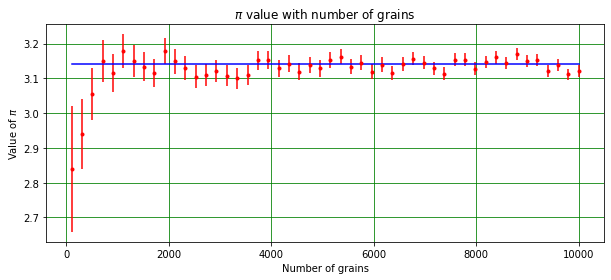

In [10]:

minGrains = 100
maxGrains = 10000
nSteps = 50
#
# The problem is that grainArr is not an array of integers. Solve most easily by forcing the values to 
# be integers. Either do this:
grainArr = np.int_(np.linspace(minGrains, maxGrains, nSteps))
# Or this:
grainArr = np.linspace(minGrains, maxGrains, nSteps).astype(int)
print("grainArr\n",grainArr[0:5])
piArr = np.zeros(nSteps)
DpiArr = np.zeros(nSteps)
#
for n in range(0, nSteps):
    riceX = np.random.rand(grainArr[n])
    riceY = np.random.rand(grainArr[n])
    riceR = np.sqrt(riceX**2 + riceY**2)
    nCircle = np.sum(riceR < 1)
    piArr[n] = 4*nCircle/grainArr[n]
    DpiArr[n] = 4*np.sqrt(nCircle/grainArr[n]*(1 - nCircle/grainArr[n])/grainArr[n])
#
plt.figure(figsize = (10,4))
plt.title("$\pi$ value with number of grains")
plt.xlabel("Number of grains")
plt.ylabel("Value of $\pi$")
plt.errorbar(grainArr, piArr, yerr = DpiArr, color = 'r', marker = '.', linestyle = '')
plt.plot(grainArr, np.pi*np.ones(nSteps), color = 'b', marker = '', linestyle = '-')
plt.grid(color = 'g')
plt.show()